### General Packages

In [510]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


### Load the Data

In [511]:
# Reading csv file and convert to data frame
df = pd.read_csv('Prostate_Cancer_Preprocessed.csv')


# From Scratch KNN

### Important Packages

In [512]:
from sklearn.metrics import accuracy_score

In [513]:
x_train = df.drop("diagnosis_result",axis=1)
x_train.drop(x_train.tail(30).index,inplace = True)
x_train=x_train.values        

print(x_train.shape)
# len(x_train)

(70, 8)


In [514]:

y_train =df["diagnosis_result"] # to make lables without inputs in array
y_test = y_train.tail(30).values
y_train.drop(y_train.tail(30).index,inplace = True)
y_train = y_train.values

        
y= y_train.reshape(len(y_train),1)
print(len(y))
print(y_test.shape)

70
(30,)


### Functions

In [515]:
def distance_ecq(x_traain,x_test_point):
    distances=[]
    for row in range(len(x_traain)) : #loop over rows in x_train
        current_train_piont = x_traain[row]
        
        current_distance = 0    #initalize distance zero
        # for eacr_row
        for column in range(len(current_train_piont)): # loop over columns(feature) in each row of x_train
            current_distance += (current_train_piont[column]-x_test_point[column])**2
        
        current_distance=np.sqrt(current_distance)
        
        distances.append(current_distance)
    
    return distances 

In [516]:
def nearest_neighbour(distance_point,k):
    # distance point: distance between test point and each ponit in tranining 
    # k : number of neighbours to consider for prediction
    nearest_neighbors_indices = np.argsort(distance_point)[:k]  ##index prediction
         
    return nearest_neighbors_indices
    

In [517]:
def voting (df_nearst , y_traain):
    ## prediction of index from past function
    nearest_neighbors_classes = y_traain[df_nearst]
    ## convert from 2 dimension to 1 dimension
    X_flattened = nearest_neighbors_classes.flatten()
    ## get most repeated
    prediction = np.argmax(np.bincount(X_flattened))
    return prediction

In [518]:
def knn_from_scratch(x_train , y_train ,x_test , k):
    y_pred = []
    for x_test_point in x_test:
        distance_point = distance_ecq(x_train,x_test_point)
        df_nearst_point = nearest_neighbour(distance_point, k)
        y_pred_point = voting(df_nearst_point,y_train)
        y_pred.append([y_pred_point])
        
    return y_pred

In [519]:
def evaluation(predicted , true):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    conf_matrix = np.zeros((2,2))

    for i in range(len(true)):
        # 1=positive, 0=negative
        if int(predicted[i][0])==1 and int(true[i])==1:
            # TRUE POSITIVE
            TP += 1

        elif int(predicted[i][0])==1 and int(true[i])==0:
            # FALSE POSITIVE
            FP += 1

        elif int(predicted[i][0])==0 and int(true[i])==0:
            # TRUE NEGATIVE
            TN += 1

        elif int(predicted[i][0])==0 and int(true[i])==1:
            # FALSE NEGATIVE
            FN += 1
    
    conf_matrix[0,0] = TN
    conf_matrix[0,1] = FP
    conf_matrix[1,0] = FN
    conf_matrix[1,1] = TP

    accuracy = (TP+TN) / (TP+TN+FP+FN)
    recall = TP / (TP + FN)
    precision = TP / (TP + FP)
    specificity = TN / (TN + FP)
    f1 = 2*(precision*recall) / (precision+recall)
    
    return conf_matrix, accuracy, recall, precision, specificity, f1

In [520]:
def plot_confusion(cf_matrix,title):
    fig,ax = plt.subplots()
    group_names = ['TN','FP','FN','TP']
    #group_names = ['TP','TN','FN','TN']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel("True")
    ax.set_title(title)

### Implementation

In [521]:
x_test = df.tail(30).drop("diagnosis_result",axis=1).values #choose data to using in test
x_test.shape

(30, 8)

In [522]:
# Fit the model with many K values
scores = []
max_score = 0
best_K = 0
for i in range(10):    
    y_pred_scratch = knn_from_scratch(x_train,y,x_test,i+1)
    accuracy = accuracy_score(y_test, y_pred_scratch)
    if accuracy > max_score:
        max_score = accuracy
        best_K = i+1
    
    scores.append( [i+1, round(accuracy*100,2)] )

In [523]:
print("Accuracy obtained by KNN models: ",scores)
print("Best K: ", best_K)
print("Best Accuracy: ", round(max_score*100,2))

Accuracy obtained by KNN models:  [[1, 63.33], [2, 76.67], [3, 83.33], [4, 86.67], [5, 83.33], [6, 86.67], [7, 83.33], [8, 83.33], [9, 80.0], [10, 80.0]]
Best K:  4
Best Accuracy:  86.67


### Evaluation

In [524]:
y_pred_scratch = knn_from_scratch(x_train,y,x_test,4)

In [525]:
confusion_matrix, accuracy, recall, precision, specificity, f1_score = evaluation(y_pred_scratch, y_test)

In [526]:
accuracy_sc = round(accuracy*100,2)
recall_sc = round(recall*100,2)
precision_sc = round(precision*100,2)
specificity_sc = round(specificity*100,2)
f1_score_sc = round(f1_score,2)

In [527]:
header = ['RNN']
table = pd.DataFrame( {"Model":header,\
                    "Accuracy(%)":accuracy_sc, "Recall(%)":recall_sc,\
                    "Precision(%)":precision_sc, "Specificity(%)":specificity_sc,\
                    "F1 Score":f1_score_sc
                    })

In [528]:
table

,Model,Accuracy(%),Recall(%),Precision(%),Specificity(%),F1 Score
0,RNN,86.67,100.0,78.95,73.33,0.88


### Confusion Matrix

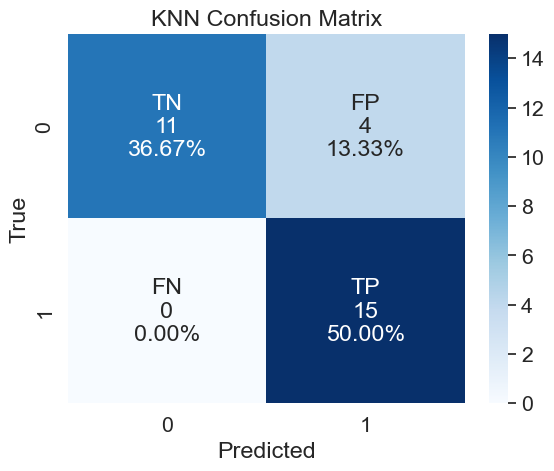

In [529]:
plot_confusion(confusion_matrix, "KNN Confusion Matrix")

# Sklearn KNN

### Important Packages

In [530]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

### Functions

In [531]:
# Function for scaling data
def Standard_Scaler (data, col_names):
    features = data[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    data[col_names] = features
    
    return data

### Implementation

In [532]:
X = df.drop( 'diagnosis_result' , axis = 1)
y = df[ ['diagnosis_result'] ]

In [533]:
X = Standard_Scaler(X, X.columns)

In [534]:
X = X.to_numpy()
y = y.to_numpy()

In [535]:
# Split the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [536]:
# Fit the model with many K values
scores=[]
max_score = 0
best_K = 0
for i in range(10):
    KNN_model = KNeighborsClassifier(n_neighbors= i+1)
    KNN_model.fit(X_train, y_train)

    # Get the accuracy of the model
    KNN_score = KNN_model.score(X_test, y_test)

    if KNN_score > max_score:
        max_score = KNN_score
        best_K = i+1
        
    scores.append([i+1, KNN_score*100])

d:\Local_env\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\Local_env\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\Local_env\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\Local_env\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self

In [537]:
print("Accuracy obtained by KNN models: ",scores)
print("Best K: ", best_K)
print("Best Accuracy: ", max_score*100)

Accuracy obtained by KNN models:  [[1, 80.0], [2, 65.0], [3, 90.0], [4, 75.0], [5, 75.0], [6, 65.0], [7, 75.0], [8, 70.0], [9, 80.0], [10, 85.0]]
Best K:  3
Best Accuracy:  90.0


### Evaluation

In [538]:
KNN_model = KNeighborsClassifier(n_neighbors= 3)
KNN_model.fit(X_train, y_train)
y_pred = KNN_model.predict(X_test)

d:\Local_env\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [539]:
accuracy_sk = round(accuracy_score(y_test, y_pred)*100, 2)
recall_sk = round(recall_score(y_test, y_pred)*100, 2)
precision_sk = round(precision_score(y_test, y_pred)*100, 2)
f1_score_sk = round(f1_score(y_test, y_pred), 2)

In [540]:
header = ['KNN']
table = pd.DataFrame( {"Model":header,\
                    "Accuracy(%)":accuracy_sk, "Recall(%)":recall_sk,\
                    "Precision(%)":precision_sk, "F1 Score":f1_score_sk
                    })

In [541]:
table

,Model,Accuracy(%),Recall(%),Precision(%),F1 Score
0,KNN,90.0,100.0,88.89,0.94


### Cross Validation

In [542]:
# Number of folds is 10
k_folds = KFold(n_splits = 10)

cross_model_scores = []
for i in range(10):
    KNN_model = KNeighborsClassifier(n_neighbors= i+1)

    # Get the average of the scores for the 10 models
    scores = cross_val_score(KNN_model, X, y, cv = k_folds)
    cross_model_scores.append( [i+1, round((scores.mean()*100),2)] )

d:\Local_env\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\Local_env\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\Local_env\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\Local_env\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self

In [543]:
print("Cross Validation Scores: ", cross_model_scores )

Cross Validation Scores:  [[1, 70.0], [2, 71.0], [3, 83.0], [4, 81.0], [5, 84.0], [6, 81.0], [7, 81.0], [8, 80.0], [9, 83.0], [10, 84.0]]


## Comparison between From scratch and Sklearn

In [544]:
header = ['KNN Sklearn' , 'KNN From Scratch']
table = pd.DataFrame( {"Model":header,\
                    "K":[3,4],\
                    "Accuracy(%)":[accuracy_sk , accuracy_sc] ,\
                    "Recall(%)":[recall_sk , recall_sc] ,\
                    "Precision(%)":[precision_sk , precision_sc] ,\
                    "F1 Score":[f1_score_sk , f1_score_sc]
                    })

In [545]:
table

,Model,K,Accuracy(%),Recall(%),Precision(%),F1 Score
0,KNN Sklearn,3,90.00,100.0,88.89,0.94
1,KNN From Scratch,4,86.67,100.0,78.95,0.88
